In [ ]:
"""!pip install featuretools==1.7.0
!pip install joblib==1.0.1
!pip install matplotlib==3.3.4
!pip install numpy==1.20.1
!pip install pandas==1.3.5
!pip install scikit_learn==0.24.1
!pip install scipy==1.6.2
!pip install seaborn==0.11.1
!pip install xgboost==1.5.1"""

In [1]:
#Importing Necessary Libraries
#Matplot and seaborn for making graphs

import featuretools as ft

import numpy as np
import pandas as pd

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


In [2]:
! pip freeze > requirements.txt

In [3]:
 #Imorting the datasets
train =pd.read_csv("train_kOBLwZA.csv")
test=pd.read_csv("test_t02dQwI.csv")

print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [4]:
def concat(X,Y):
    df= pd.concat([X,Y],ignore_index=True)
    return df

In [5]:
df=concat(train,test)
print(df.shape)

(14204, 12)


In [6]:
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [38]:
# Exaplanotry Code
# df['Item_Identifier'].value_counts()

In [7]:
df.isnull().sum()  
#Checks number of null values for all the variables
#Item_Weight has 2439 null values 
#Outlet Size has 4016 null values

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [8]:
df.apply(lambda x: len(x.unique()))
#Checks the number of unique entries correspnding to each variable

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [13]:
#defining a function:
#frequency of unique entries in each columns with their names

def frequency_each_item(X,Y):
    for i in Y:
        print("frequency of each category for",i)
        print(X[i].value_counts())
        print("-"*60)

In [14]:
# Explain code
# df['Item_Fat_Content'].value_counts()

In [15]:
#frequency of unique entries in each columns with their names
category=['Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']
frequency_each_item(df,category)

frequency of each category for Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
------------------------------------------------------------
frequency of each category for Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
------------------------------------------------------------
frequency of each category for Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64
------------------------

In [16]:
df.head(10)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15        9.300          Low Fat         0.016047   
1           DRC01        5.920          Regular         0.019278   
2           FDN15       17.500          Low Fat         0.016760   
3           FDX07       19.200          Regular         0.000000   
4           NCD19        8.930          Low Fat         0.000000   
5           FDP36       10.395          Regular         0.000000   
6           FDO10       13.650          Regular         0.012741   
7           FDP10          NaN          Low Fat         0.127470   
8           FDH17       16.200          Regular         0.016687   
9           FDU28       19.200          Regular         0.094450   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   
5           Baking Goods   51.4008            OUT018   
6            Snack Foods   57.6588            OUT013   
7            Snack Foods  107.7622            OUT027   
8           Frozen Foods   96.9726            OUT045   
9           Frozen Foods  187.8214            OUT017   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998         NaN               Tier 3   
4                       1987        High               Tier 3   
5                       2009      Medium               Tier 3   
6                       1987        High               Tier 3   
7                       1985      Medium               Tier 3   
8                       2002         NaN               Tier 2   
9                       2007         NaN               Tier 2   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052  
5  Supermarket Type2           556.6088  
6  Supermarket Type1           343.5528  
7  Supermarket Type3          4022.7636  
8  Supermarket Type1          1076.5986  
9  Supermarket Type1          4710.5350

## Sanity Check

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


### Fixing Inconsistencies in "Item_Fat_Content"

In [19]:
# Code Explain
# df.replace?
# df['Item_Fat_Content'].replace({low fat':'Low Fat','reg':'Regular','LF':'Low Fat'},inplace=True)

In [20]:
# Correcting the mis-written datas
df['Item_Fat_Content'].replace(to_replace =['low fat','reg','LF'], 
                 value =['Low Fat','Regular','Low Fat'],inplace=True)
df['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

### Handling Missing Value for "Outlet_Size"

In [40]:
## Explantory Code
# df.groupby(['Outlet_Type','Outlet_Size'])['Outlet_Size'].count()

# mode_Outlet_Size= df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)
# print(mode_Outlet_Size)


# mode_Outlet_Size.loc['Supermarket Type3']

# bool2 = df['Outlet_Size'].isnull()

# bool2

# df['Outlet_Size']

# df['Outlet_Size'][bool2]

# df['Outlet_Type'][bool2]

# df['Outlet_Size'][bool2] = df['Outlet_Type'][bool2].apply(lambda x : mode_Outlet_Size.loc[x]).values

# df['Outlet_Size'][bool2]

# sum(df['Outlet_Size'].isnull())

In [ ]:
mode_Outlet_Size= df.groupby(['Outlet_Type'])['Outlet_Size'].agg(pd.Series.mode)
print(mode_Outlet_Size)
bool2=df['Outlet_Size'].isnull()
df['Outlet_Size'][bool2]=df['Outlet_Type'][bool2].apply(lambda x : mode_Outlet_Size.loc[x]).values
sum(df['Outlet_Size'].isnull())

### Handling Missing Value for "Item_Weight"

In [41]:
avg_item_weight=df.groupby('Item_Identifier')['Item_Weight'].agg(np.mean)
print(avg_item_weight)
bool_value= df['Item_Weight'].isnull()
df['Item_Weight'][bool_value]=df['Item_Identifier'][bool_value].apply(lambda x :avg_item_weight.loc[x]).values
sum(df['Item_Weight'].isnull())

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64


0

In [ ]:
## Explanation code--
# avg_item_weight[avg_item_weight.index=='DRI11']
# df['Item_Weight'][bool_value],df['Item_Identifier'][bool_value]
# df['Item_Weight'][7],df['Item_Weight'][18]
# df['Item_Weight'][7],df['Item_Weight'][18]

In [43]:
df.sample(8)

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
7712            FDR15        9.300          Regular         0.033490   
12801           FDQ25        8.630          Regular         0.028277   
3307            DRI01        7.970          Low Fat         0.034424   
14133           FDP23        6.710          Low Fat         0.035587   
3620            NCC06       19.000          Low Fat         0.026986   
8103            FDT02       12.600          Low Fat         0.024293   
1178            FDY52        6.365          Low Fat         0.007348   
13720           NCT18       14.600          Low Fat         0.104011   

          Item_Type  Item_MRP Outlet_Identifier  Outlet_Establishment_Year  \
7712           Meat  156.6314            OUT049                       1999   
12801        Canned  173.6422            OUT046                       1997   
3307    Soft Drinks  171.8422            OUT013                       1987   
14133        Breads  219.5166            OUT046                       1997   
3620      Household  127.1336            OUT046                       1997   
8103          Dairy   33.4874            OUT018                       2009   
1178   Frozen Foods   62.8536            OUT046                       1997   
13720     Household  179.1976            OUT019                       1985   

      Outlet_Size Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  
7712       Medium               Tier 1  Supermarket Type1          1241.0512  
12801       Small               Tier 1  Supermarket Type1                NaN  
3307         High               Tier 3  Supermarket Type1          2069.3064  
14133       Small               Tier 1  Supermarket Type1                NaN  
3620        Small               Tier 1  Supermarket Type1          2812.3392  
8103       Medium               Tier 3  Supermarket Type2           105.8622  
1178        Small               Tier 1  Supermarket Type1           796.2968  
13720       Small               Tier 1      Grocery Store                NaN

In [46]:
#Reducing food category to only 3 types with the help of the first 2 alphabets of the Item_Identifier column

df['Item_Type_combined']=df['Item_Identifier'].apply(lambda x : x[0:2])
df['Item_Type_combined'].replace(to_replace =['FD','DR','NC'], 
                 value =['Food','Drinks','Non_consumable'],inplace=True)
 #dropping the redundant column
df=df.drop(columns=['Item_Type'])     
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
0           FDA15         9.30          Low Fat         0.016047  249.8092   
1           DRC01         5.92          Regular         0.019278   48.2692   
2           FDN15        17.50          Low Fat         0.016760  141.6180   
3           FDX07        19.20          Regular         0.000000  182.0950   
4           NCD19         8.93          Low Fat         0.000000   53.8614   

  Outlet_Identifier  Outlet_Establishment_Year Outlet_Size  \
0            OUT049                       1999      Medium   
1            OUT018                       2009      Medium   
2            OUT049                       1999      Medium   
3            OUT010                       1998       Small   
4            OUT013                       1987        High   

  Outlet_Location_Type        Outlet_Type  Item_Outlet_Sales  \
0               Tier 1  Supermarket Type1          3735.1380   
1               Tier 3  Supermarket Type2           443.4228   
2               Tier 1  Supermarket Type1          2097.2700   
3               Tier 3      Grocery Store           732.3800   
4               Tier 3  Supermarket Type1           994.7052   

  Item_Type_combined  
0               Food  
1             Drinks  
2               Food  
3               Food  
4     Non_consumable

In [47]:
#Calculating number of Item_fat_contents that are also non_consumable

bool3=df['Item_Type_combined']=='Non_consumable'

df['Item_Fat_Content'][bool3]='Non_edible'
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non_edible    2686
Name: Item_Fat_Content, dtype: int64

In [48]:
#Using feature Engineering and adding new column
df['years_old']=2013-df['Outlet_Establishment_Year']
df=df.drop(columns=['Outlet_Establishment_Year'])
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
0           FDA15         9.30          Low Fat         0.016047  249.8092   
1           DRC01         5.92          Regular         0.019278   48.2692   
2           FDN15        17.50          Low Fat         0.016760  141.6180   
3           FDX07        19.20          Regular         0.000000  182.0950   
4           NCD19         8.93       Non_edible         0.000000   53.8614   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   
2            OUT049      Medium               Tier 1  Supermarket Type1   
3            OUT010       Small               Tier 3      Grocery Store   
4            OUT013        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales Item_Type_combined  years_old  
0          3735.1380               Food         14  
1           443.4228             Drinks          4  
2          2097.2700               Food         14  
3           732.3800               Food         15  
4           994.7052     Non_consumable         26

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Identifier       14204 non-null  object 
 1   Item_Weight           14204 non-null  float64
 2   Item_Fat_Content      14204 non-null  object 
 3   Item_Visibility       14204 non-null  float64
 4   Item_MRP              14204 non-null  float64
 5   Outlet_Identifier     14204 non-null  object 
 6   Outlet_Size           14204 non-null  object 
 7   Outlet_Location_Type  14204 non-null  object 
 8   Outlet_Type           14204 non-null  object 
 9   Item_Outlet_Sales     8523 non-null   float64
 10  Item_Type_combined    14204 non-null  object 
 11  years_old             14204 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [50]:
# Converting all the zero values to mean in the visibility column
Item_Visibility_mean=df.groupby('Item_Identifier' )['Item_Visibility'].mean()
bool4=df['Item_Visibility']==0
df['Item_Visibility'][bool4]=df['Item_Identifier'][bool4].apply(lambda x:Item_Visibility_mean.loc[x]).values
df.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  Item_MRP  \
0           FDA15         9.30          Low Fat         0.016047  249.8092   
1           DRC01         5.92          Regular         0.019278   48.2692   
2           FDN15        17.50          Low Fat         0.016760  141.6180   
3           FDX07        19.20          Regular         0.017834  182.0950   
4           NCD19         8.93       Non_edible         0.009780   53.8614   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   
2            OUT049      Medium               Tier 1  Supermarket Type1   
3            OUT010       Small               Tier 3      Grocery Store   
4            OUT013        High               Tier 3  Supermarket Type1   

   Item_Outlet_Sales Item_Type_combined  years_old  
0          3735.1380               Food         14  
1           443.4228             Drinks          4  
2          2097.2700               Food         14  
3           732.3800               Food         15  
4           994.7052     Non_consumable         26

In [51]:
#Checks for correation between different numerical columns
df.corr()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
Item_Weight           1.000000        -0.022028  0.035751           0.013261   
Item_Visibility      -0.022028         1.000000 -0.007550          -0.128453   
Item_MRP              0.035751        -0.007550  1.000000           0.567574   
Item_Outlet_Sales     0.013261        -0.128453  0.567574           1.000000   
years_old            -0.000247         0.084481 -0.000141           0.049135   

                   years_old  
Item_Weight        -0.000247  
Item_Visibility     0.084481  
Item_MRP           -0.000141  
Item_Outlet_Sales   0.049135  
years_old           1.000000

# Identifying outliers and fixing them

In [52]:
df.describe()            

Item_Weight  Item_Visibility      Item_MRP  Item_Outlet_Sales  \
count  14204.000000     14204.000000  14204.000000        8523.000000   
mean      12.793380         0.069710    141.004977        2181.288914   
std        4.651716         0.049728     62.086938        1706.499616   
min        4.555000         0.003575     31.290000          33.290000   
25%        8.710000         0.031145     94.012000         834.247400   
50%       12.600000         0.057194    142.247000        1794.331000   
75%       16.750000         0.096930    185.855600        3101.296400   
max       21.350000         0.328391    266.888400       13086.964800   

          years_old  
count  14204.000000  
mean      15.169319  
std        8.371664  
min        4.000000  
25%        9.000000  
50%       14.000000  
75%       26.000000  
max       28.000000

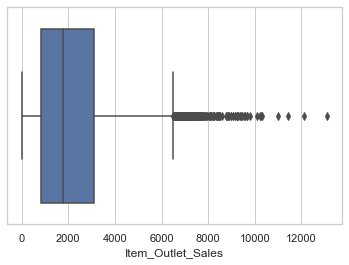

In [53]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=df["Item_Outlet_Sales"])

In [ ]:
#As we know only Item_Outlet_Sales have outliers we can fix them but fixing them will increase our RMSE score 
#to a large extent

# Plotting Graphs for more Analysis

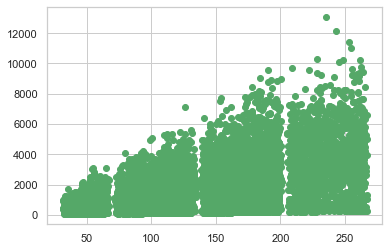

In [54]:
#value of sales increases for the increase in MRP of the item
plt.scatter(df.Item_MRP,df.Item_Outlet_Sales,c='g')
plt.show()

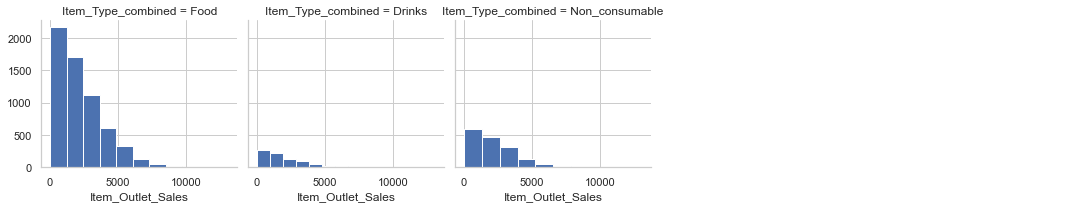

In [55]:
sns.FacetGrid(df, col='Item_Type_combined', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# Maximum contribution to outlet sales is from Items that are food type and least is from drinks

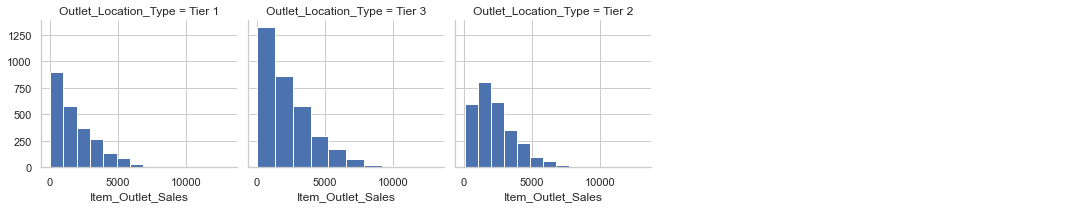

In [56]:
sns.FacetGrid(df, col='Outlet_Location_Type', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Tier3 type of outlet location provides for the maximum sales and other two provides the least sales

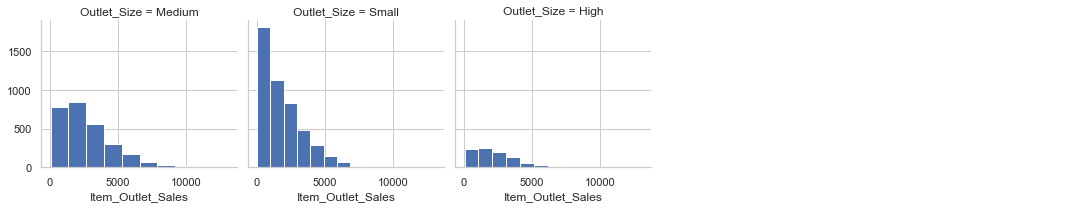

In [57]:
sns.FacetGrid(df, col='Outlet_Size', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Small sized Outlets are providing the maximum sales whereas large sized outlets 
# are contributing the least

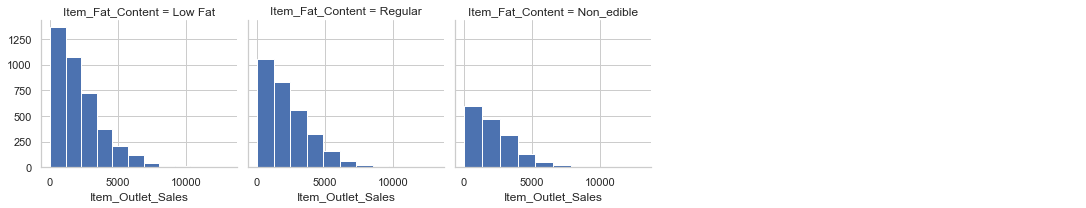

In [58]:
sns.FacetGrid(df, col='Item_Fat_Content', size=3, col_wrap=5) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
# people are prefering items with lowest fat content the most 

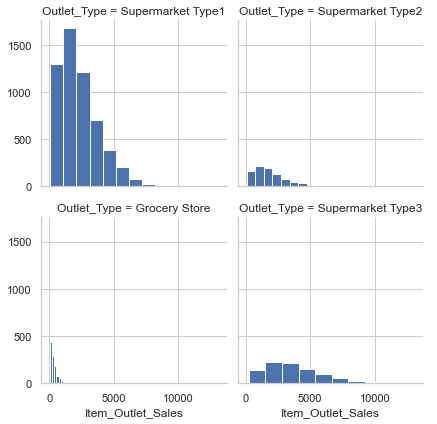

In [59]:
sns.FacetGrid(df, col='Outlet_Type', size=3, col_wrap=2) \
    .map(plt.hist, 'Item_Outlet_Sales') \
    .add_legend();
#Maximum of the high sales margin is from Supermarket Type1
#Grocery store has the least sales

In [60]:
#Label Encoding all the columns with text entries and dropping Item_identifier  
le=LabelEncoder()
list=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_combined',
      'Outlet_Size']
for i in list:
    le.fit(df[i])
    df[i]=le.transform(df[i])
df_new=df.drop(columns='Item_Identifier')  # frequency encoding
df_new= pd.get_dummies(df_new,columns=['Outlet_Identifier'])
df_new.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0         9.30                 0         0.016047  249.8092            1   
1         5.92                 2         0.019278   48.2692            1   
2        17.50                 0         0.016760  141.6180            1   
3        19.20                 2         0.017834  182.0950            2   
4         8.93                 1         0.009780   53.8614            0   

   Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  Item_Type_combined  \
0                     0            1          3735.1380                   1   
1                     2            2           443.4228                   0   
2                     0            1          2097.2700                   1   
3                     2            0           732.3800                   1   
4                     2            1           994.7052                   2   

   years_old  Outlet_Identifier_OUT010  Outlet_Identifier_OUT013  \
0         14                         0                         0   
1          4                         0                         0   
2         14                         0                         0   
3         15                         1                         0   
4         26                         0                         1   

   Outlet_Identifier_OUT017  Outlet_Identifier_OUT018  \
0                         0                         0   
1                         0                         1   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT027  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  
0                         0                         1  
1                         0                         0  
2                         0                         1  
3                         0                         0  
4                         0                         0

In [63]:
# explanatory code
# df.corr()
# sns.heatmap(df.corr())

In [65]:
df_new.iloc[:8523,:]

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0           9.300                 0         0.016047  249.8092            1   
1           5.920                 2         0.019278   48.2692            1   
2          17.500                 0         0.016760  141.6180            1   
3          19.200                 2         0.017834  182.0950            2   
4           8.930                 1         0.009780   53.8614            0   
...           ...               ...              ...       ...          ...   
8518        6.865                 0         0.056783  214.5218            0   
8519        8.380                 2         0.046982  108.1570            2   
8520       10.600                 1         0.035186   85.1224            2   
8521        7.210                 2         0.145221  103.1332            1   
8522       14.800                 0         0.044878   75.4670            2   

      Outlet_Location_Type  Outlet_Type  Item_Outlet_Sales  \
0                        0            1          3735.1380   
1                        2            2           443.4228   
2                        0            1          2097.2700   
3                        2            0           732.3800   
4                        2            1           994.7052   
...                    ...          ...                ...   
8518                     2            1          2778.3834   
8519                     1            1           549.2850   
8520                     1            1          1193.1136   
8521                     2            2          1845.5976   
8522                     0            1           765.6700   

      Item_Type_combined  years_old  Outlet_Identifier_OUT010  \
0                      1         14                         0   
1                      0          4                         0   
2                      1         14                         0   
3                      1         15                         1   
4                      2         26                         0   
...                  ...        ...                       ...   
8518                   1         26                         0   
8519                   1         11                         0   
8520                   2          9                         0   
8521                   1          4                         0   
8522                   0         16                         0   

      Outlet_Identifier_OUT013  Outlet_Identifier_OUT017  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            1                         0   
...                        ...                       ...   
8518                         1                         0   
8519                         0                         0   
8520                         0                         0   
8521                         0                         0   
8522                         0                         0   

      Outlet_Identifier_OUT018  Outlet_Identifier_OUT019  \
0                            0                         0   
1                            1                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
8518                         0                         0   
8519                         0                         0   
8520                         0                         0   
8521                         1                         0   
8522                         0                         0   

      Outlet_Identifier_OUT027  Outlet_Identifier_OUT035  \
0                            

In [66]:
#Separating test and train set
df_new_train=df_new.iloc[:8523,:]

df_new_test=df_new.iloc[8523:,:]

df_new_test=df_new_test.drop(columns=['Item_Outlet_Sales'])

In [67]:
Y_train=df_new_train['Item_Outlet_Sales']

df_train_test= df_new_train.drop(columns=['Item_Outlet_Sales'])

In [68]:
df_train_test.shape

(8523, 19)

In [69]:
df_train_test.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Type_combined', 'years_old', 'Outlet_Identifier_OUT010',
       'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017',
       'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019',
       'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035',
       'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046',
       'Outlet_Identifier_OUT049'],
      dtype='object')

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet 
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import QuantileRegressor
#### To Be applied after we cover these Algorithms.

# from sklearn.ensemble import RandomForestRegressor 
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.ensemble import BaggingRegressor
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.neural_network import MLPRegressor
# from xgboost import XGBRegressor
# import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [71]:
models = [('lr',LinearRegression()),
          ('sgd',SGDRegressor()),
          ('lasso',Lasso()),
          ('ridge',Ridge()),
          ('en',ElasticNet()),
          ('huber',HuberRegressor()),
          ('ransac',RANSACRegressor()),
          ('theilSen',TheilSenRegressor())
         ]

In [72]:
import sklearn
sklearn.metrics.get_scorer_names()

# For evaluating multiple scores, use sklearn.model_selection.cross_validate instead. ['r2'] was passed.

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

In [80]:
#Making function for making best 2 models for further hyperparameter tuning
#  https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation
def basic_model_selection(x,y,cross_folds,model):
    scores=[]
    names = []
    for i , j in model:
        cv_scores = cross_val_score(j, x, y,cv=cross_folds,n_jobs=5)
        scores.append(cv_scores)
        names.append(i)
    for k in range(len(scores)):
        print(names[k],scores[k].mean())

In [81]:
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
sgd -5.317113792430814e+18
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
huber 0.5539649597942178
ransac 0.4806861475483919
theilSen 0.5509695482298221


In [79]:
# N Mse score
basic_model_selection(df_train_test,Y_train,4,models)

lr -1278990.7534096912
sgd -9.209896187607132e+24
lasso -1278928.5809685015
ridge -1278979.4368474921
en -1519096.7131449347
huber -1297497.1451029142
ransac -1488614.7669180273
theilSen -1307742.1976298788


In [76]:
# N Mae score
basic_model_selection(df_train_test,Y_train,4,models)

lr -838.6430244950401
sgd -3901297803447.813
lasso -838.2312980210631
ridge -838.6018592402061
en -910.6618311811606
huber -831.7453885206883
ransac -885.5501875152274
theilSen -844.2257366932621


In [74]:
# R2 score
basic_model_selection(df_train_test,Y_train,4,models)

lr 0.5600167514366816
sgd -8.68727064128838e+17
lasso 0.5600380234974154
ridge 0.5600211200777784
en 0.4778293365405345
huber 0.5539649597942178
ransac 0.43904982490996314
theilSen 0.5508724721083533


# Standardization of the model before training

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

standardized=scaler.fit_transform(df_train_test)
column_names = df_train_test.columns
df_standardized = pd.DataFrame(data=standardized,columns=column_names)
df_standardized.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0    -0.769246         -0.997813        -1.081039  1.747454    -0.664080   
1    -1.496813          1.236942        -1.016230 -1.489023    -0.664080   
2     0.995858         -0.997813        -1.066741  0.010040    -0.664080   
3     1.361794          1.236942        -1.045193  0.660050     0.799954   
4    -0.848890          0.119565        -1.206757 -1.399220    -2.128115   

   Outlet_Location_Type  Outlet_Type  Item_Type_combined  years_old  \
0             -1.369334    -0.252658           -0.179795  -0.139541   
1              1.091569     1.002972           -2.095286  -1.334103   
2             -1.369334    -0.252658           -0.179795  -0.139541   
3              1.091569    -1.508289           -0.179795  -0.020085   
4              1.091569    -0.252658            1.735696   1.293934   

   Outlet_Identifier_OUT010  Outlet_Identifier_OUT013  \
0                 -0.263920                 -0.350395   
1                 -0.263920                 -0.350395   
2                 -0.263920                 -0.350395   
3                  3.789031                 -0.350395   
4                 -0.263920                  2.853918   

   Outlet_Identifier_OUT017  Outlet_Identifier_OUT018  \
0                 -0.349128                 -0.349551   
1                 -0.349128                  2.860816   
2                 -0.349128                 -0.349551   
3                 -0.349128                 -0.349551   
4                 -0.349128                 -0.349551   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT027  \
0                 -0.256985                 -0.351028   
1                 -0.256985                 -0.351028   
2                 -0.256985                 -0.351028   
3                 -0.256985                 -0.351028   
4                 -0.256985                 -0.351028   

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                 -0.349973                 -0.349762   
1                 -0.349973                 -0.349762   
2                 -0.349973                 -0.349762   
3                 -0.349973                 -0.349762   
4                 -0.349973                 -0.349762   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  
0                 -0.349973                  2.857362  
1                 -0.349973                 -0.349973  
2                 -0.349973                  2.857362  
3                 -0.349973                 -0.349973  
4                 -0.349973                 -0.349973

In [83]:
basic_model_selection(df_standardized,Y_train,4,models)

lr 0.5596423399412482
sgd 0.5572413726705534
lasso 0.5600954106586716
ridge 0.5600174793091026
en 0.5116678074172953
huber 0.5540855379256
ransac 0.48064099605091526
theilSen 0.5226775073809735


# Using Robust Scaler

#### My dataset having outliers make it more prone to mistakes
* Robust Scaler handles the outliers as well
* It scales according to the quartile range

In [84]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

normalize = MinMaxScaler()
robust = RobustScaler(quantile_range = (0.1,0.8)) #range of inerquartile is one of the parameters

robust_stan = robust.fit_transform(df_train_test)
robust_stan_normalize = normalize.fit_transform(robust_stan)

# also normalized the dataset using MinMaxScaler i.e has bought the data set between (0,1)
df_robust_normalize = pd.DataFrame(robust_stan_normalize,columns=column_names)
df_robust_normalize.head()

Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  Outlet_Size  \
0     0.282525               0.0         0.038399  0.927507          0.5   
1     0.081274               1.0         0.048346  0.072068          0.5   
2     0.770765               0.0         0.040593  0.468288          0.5   
3     0.871986               1.0         0.043901  0.640093          1.0   
4     0.260494               0.5         0.019104  0.095805          0.0   

   Outlet_Location_Type  Outlet_Type  Item_Type_combined  years_old  \
0                   0.0     0.333333                 0.5   0.416667   
1                   1.0     0.666667                 0.0   0.000000   
2                   0.0     0.333333                 0.5   0.416667   
3                   1.0     0.000000                 0.5   0.458333   
4                   1.0     0.333333                 1.0   0.916667   

   Outlet_Identifier_OUT010  Outlet_Identifier_OUT013  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       1.0                       0.0   
4                       0.0                       1.0   

   Outlet_Identifier_OUT017  Outlet_Identifier_OUT018  \
0                       0.0                       0.0   
1                       0.0                       1.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT019  Outlet_Identifier_OUT027  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT035  Outlet_Identifier_OUT045  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   Outlet_Identifier_OUT046  Outlet_Identifier_OUT049  
0                       0.0                       1.0  
1                       0.0                       0.0  
2                       0.0                       1.0  
3                       0.0                       0.0  
4                       0.0                       0.0

In [85]:
basic_model_selection(df_robust_normalize,Y_train,4,models)

lr 0.5600807120780363
sgd 0.5599988284291553
lasso 0.5602359565219659
ridge 0.560024447390153
en 0.16451783452458144
huber 0.5540659349000969
ransac 0.41310693071175153
theilSen 0.5464422526108175


# Best Model 
#### Comparing all models using RMSE score 

In [86]:
robust_test = robust.fit_transform(df_new_test)
robust_normalize_test = normalize.fit_transform(robust_test)
df_test_robust_normalize = pd.DataFrame(robust_normalize_test,columns=column_names)

In [87]:
model = LinearRegression()
# Defining my final model that I will use for prediction

In [88]:
model.fit(df_robust_normalize,Y_train)

LinearRegression()

In [89]:
# Metrics Calculation
from sklearn.metrics import r2_score, mean_absolute_error ,mean_squared_error

import math
def root_mean_squared_error(y,y_pred):
    mse =np.square(np.subtract(y,y_pred)).mean()
    rmse = math.sqrt(mse)
    return rmse

In [90]:
model.intercept_ , model.coef_

(-4907991773321971.0,
 array([ 5.58926229e-01,  4.56752910e+01, -5.16607548e+01,  3.66303252e+03,
         1.01747310e+16, -8.61239758e+15,  1.45758184e+15, -4.98389230e+01,
         9.80926433e+14,  2.89606710e+15,  1.21353462e+16, -1.52814489e+15,
         7.46130264e+15, -6.24766563e+15,  5.99451559e+15, -1.65076070e+15,
        -1.73250457e+15, -6.24306303e+15, -1.07395368e+15]))

In [91]:
print("MAE Score for model is : ",mean_absolute_error(Y_train,model.predict(df_robust_normalize)))
print("MSE Score for model is : ",mean_squared_error(Y_train,model.predict(df_robust_normalize)))
print("RMSE Score for model is : ",root_mean_squared_error(Y_train,model.predict(df_robust_normalize)))
print("R2 Score for model is : ",r2_score(Y_train,model.predict(df_robust_normalize)))

MAE Score for model is :  835.9927097500881
MSE Score for model is :  1271277.8520971958
RMSE Score for model is :  1127.5095796032936
R2 Score for model is :  0.5634047063842056


In [92]:
final_prediction=model.predict(df_test_robust_normalize) #Predicting the outlet sales

In [93]:
#the prediction is in the form of numpy array 
# Converting into Dataframe 
df_final_prediction = pd.DataFrame(final_prediction,columns=['Item_Outlet_Sales'])

In [94]:
df_final_prediction.head()

Item_Outlet_Sales
0             1831.0
1             1549.0
2             1892.0
3             2565.0
4             5189.0

# Saving the final model using Joblib

In [96]:
import joblib
filename = 'linear_regression.sav' # Name of the model 
joblib.dump(model, filename) # it is saved in your current working directory

['linear_regression.sav']

In [97]:
# This command loads the model once again
load_model = joblib.load(filename)

In [98]:
float_formatter = "{:.2f}".format

In [100]:
load_model.predict(np.array(df_robust_normalize.iloc[0,:]).reshape(1, -1))

array([4042.])

In [101]:
load_model.predict(np.array(df_robust_normalize.iloc[0:5,:]))

array([4042.,  604., 2360., 1023.,  928.])

In [99]:
df.head()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_MRP  \
0           FDA15         9.30                 0         0.016047  249.8092   
1           DRC01         5.92                 2         0.019278   48.2692   
2           FDN15        17.50                 0         0.016760  141.6180   
3           FDX07        19.20                 2         0.017834  182.0950   
4           NCD19         8.93                 1         0.009780   53.8614   

  Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0            OUT049            1                     0            1   
1            OUT018            1                     2            2   
2            OUT049            1                     0            1   
3            OUT010            2                     2            0   
4            OUT013            0                     2            1   

   Item_Outlet_Sales  Item_Type_combined  years_old  
0          3735.1380                   1         14  
1           443.4228                   0          4  
2          2097.2700                   1         14  
3           732.3800                   1         15  
4           994.7052                   2         26

# The Models for hyperparameter tuning are same Regression Models 

In [ ]:
def model_parameter_tuning(x,y,model,parameters,cross_folds):
    model_grid = GridSearchCV(model,
                        parameters,
                        cv = cross_folds,
                        n_jobs = 5,
                        verbose=True)
    model_grid.fit(x,y)
    y_predicted = model_grid.predict(x)
    print(model_grid.score)
    print(model_grid.best_params_)
    print("The RMSE score is",np.sqrt(np.mean((y-y_predicted)**2)))

#defining function for hyper parameter tuning and using RMSE as my metric

# model_parameter_tuning(df_standardized,Y_train,model,model_parameters,4)

# Building ML Pipeline for these Regression Models

# Building API for these Regression Models